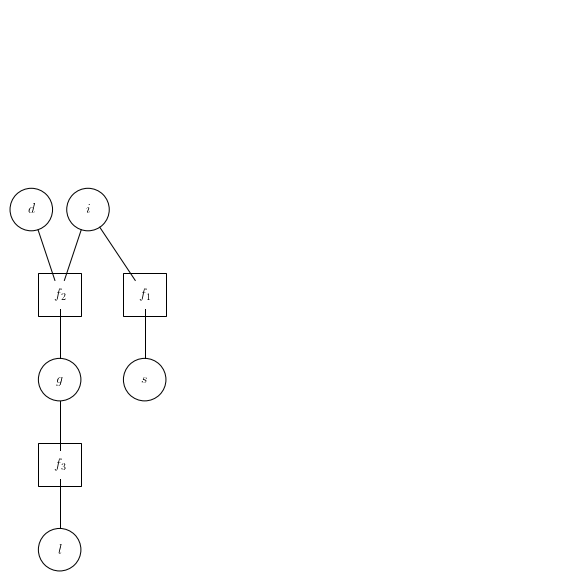

In [9]:
import numpy as np
import daft
import itertools
import pandas as pd
from matplotlib import rc
from matplotlib import pyplot as plt

rc("font", family="serif", size=14)

rc("text", usetex=True)

plt.rcParams['text.latex.preamble']=r"\usepackage{amsmath}"
pgm = daft.PGM([20, 20], node_unit=1.5, grid_unit=1,directed=False)

# variable.
pgm.add_node(daft.Node("d", r"$d$",x = 1,y = 19))
pgm.add_node(daft.Node("i", r"$i$",x = 3,y = 19))
pgm.add_node(daft.Node("g", r"$g$",x = 2,y = 13))
pgm.add_node(daft.Node("s", r"$s$",x = 5,y = 13))
pgm.add_node(daft.Node("l", r"$l$",x = 2,y = 7))

# factors.
pgm.add_node(daft.Node("f1", r"$f_1$",x = 5,y = 16,shape="rectangle"))
pgm.add_node(daft.Node("f2", r"$f_2$",x = 2,y = 16,shape="rectangle"))
pgm.add_node(daft.Node("f3", r"$f_3$",x = 2,y = 10,shape="rectangle"))

# Add in the edges.
pgm.add_edge("d", "f2")
pgm.add_edge("i", "f2")
pgm.add_edge("f2", "g")
pgm.add_edge("g", "f3")
pgm.add_edge("f3", "l")
pgm.add_edge("i", "f1")
pgm.add_edge("f1", "s")

# Render and save.
pgm.render()


In [2]:
binary_states=range(2)
grade_states=range(3)
pi=np.array([0.7,0.3])
pd=np.array([0.6,0.4])
ps=np.array([[0.95,0.05],[0.2,0.8]])
pl=np.array([[0.1,0.9],[0.4,0.6],[0.99,0.01]])
pg=np.array([[[0.3,0.4,0.3],[0.05,0.25,0.7]],[[0.9,0.08,0.02],[0.5,0.3,0.2]]])#[i,d,g]
#f1=p(i)*p(s|i)
#f2=p(d)*p(g|i,d)
#f3=p(l|g)

In [3]:
l_to_f3=1
s_to_f1=1
d_to_f2=1
f1_to_i=ps.sum(axis=1)*pi
f3_to_g=pl.sum(axis=1)
g_to_f2=f3_to_g
i_to_f2=f1_to_i

In [4]:
#p(d)
f2_to_d=np.zeros(2)
for i,d,g in itertools.product(binary_states,binary_states,grade_states):
    f2_to_d[d]+=pg[i,d,g]*i_to_f2[i]*g_to_f2[g]*pd[d]
marg_d=f2_to_d
print("p(d)=",marg_d)

p(d)= [0.6 0.4]


In [5]:
#p(i)
f2_to_i=np.zeros(2)
for i,d,g in itertools.product(binary_states,binary_states,grade_states):
    f2_to_i[i]+=pg[i,d,g]*g_to_f2[g]*pd[d]
marg_i=f2_to_i*f1_to_i
marg_i/=marg_i.sum()
print("p(i)=",marg_i)

p(i)= [0.7 0.3]


In [6]:
#p(g)
f2_to_g=np.zeros(3)
for i,d,g in itertools.product(binary_states,binary_states,grade_states):
    f2_to_g[g]+=pg[i,d,g]*i_to_f2[i]*pd[d]
marg_g=f2_to_g*f3_to_g
marg_g/=marg_g.sum()
print("p(g)=",marg_g)

p(g)= [0.362  0.2884 0.3496]


In [7]:
#p(l)
g_to_f3=f2_to_g
f3_to_l=np.zeros(2)
for l,g in itertools.product(binary_states,grade_states):
    f3_to_l[l]+=pl[g,l]*g_to_f3[g]
f3_to_l
marg_l=f3_to_l/f3_to_l.sum()
print("p(l)=",marg_l)

p(l)= [0.497664 0.502336]


In [8]:
#p(s)
i_to_f1=f2_to_i
f1_to_s=np.zeros(2)
for i,s in itertools.product(binary_states,binary_states):
    f1_to_s[s]+=ps[i,s]*i_to_f1[i]*pi[i]
f1_to_s
marg_s=f1_to_s
print("p(s)=",marg_s)

p(s)= [0.725 0.275]
